In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, confusion_matrix, f1_score,classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [84]:
df_test = pd.read_csv("Test_data.csv")
X_test = df_test.drop(["Target"],axis = 1)
y_test = df_test["Target"]

In [85]:
df_train = pd.read_csv("Train_data.csv")
X_train = df_train.drop(["Target"],axis = 1)
y_train= df_train["Target"]

In [86]:
y_train.value_counts()

0    2442
1    1280
Name: Target, dtype: int64

In [87]:
columns = X_train.columns

In [88]:
columns

Index(['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
       'Education_Bachelors', 'Education_Masters', 'Education_PHD',
       'City_Bangalore', 'City_New Delhi', 'City_Pune', 'Gender_Male',
       'EverBenched_Yes'],
      dtype='object')

In [89]:
SGD_model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
SGD_model.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [90]:
predictions = SGD_model.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
confusion_matrix(y_test,predictions)

array([[534,  77],
       [187, 133]], dtype=int64)

In [93]:
param_grid = {
    'loss': ['log', 'hinge'],
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': [1000, 2000],
    'random_state': [42],
}

In [94]:
grid_search_sgd = GridSearchCV(SGD_model, param_grid, cv=5, scoring='accuracy')
grid_search_sgd.fit(X_train, y_train)

best_params_sgd = grid_search_sgd.best_params_
best_score_sgd = grid_search_sgd.best_score_

print(best_params_sgd,best_score_sgd)

{'alpha': 0.001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42} 0.7334747780904958


In [95]:
SGD_model.set_params(**best_params_sgd)

SGDClassifier(alpha=0.001, random_state=42)

In [96]:
SGD_model.fit(X_train, y_train)

SGDClassifier(alpha=0.001, random_state=42)

<Axes: ylabel='Feature'>

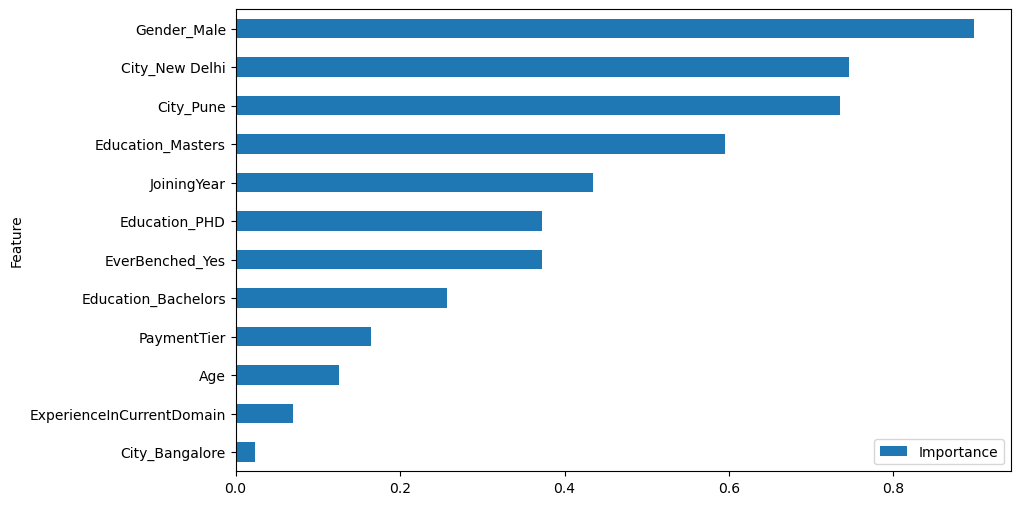

In [97]:
coefficients = SGD_model.coef_[0]

feature_importance = pd.DataFrame({'Feature': columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [98]:
feature_importance[feature_importance['Importance'] < 0.2]['Feature'].to_list()

['City_Bangalore', 'ExperienceInCurrentDomain', 'Age', 'PaymentTier']

In [99]:
predictions = SGD_model.predict(X_test)

In [100]:
metrics = {
    'Precision': precision_score(y_test, predictions),
    'Recall': recall_score(y_test, predictions),
    'AUC': roc_auc_score(y_test, predictions),
    'F1 Score': f1_score(y_test, predictions),
    'Accuracy': accuracy_score(y_test, predictions)
}

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.67
Recall: 0.46
AUC: 0.67
F1 Score: 0.54
Accuracy: 0.74


In [101]:
feature_to_drop = feature_importance[feature_importance['Importance'] < 0.2]['Feature'].to_list()
X_train_new = X_train.drop(feature_to_drop,axis=1)
X_test_new  = X_test.drop(feature_to_drop,axis=1)

In [102]:
param_grid = {
    'loss': ['log', 'hinge'],
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': [1000, 2000],
    'random_state': [42],
}

In [103]:
grid_search_sgd = GridSearchCV(SGD_model, param_grid, cv=5, scoring='accuracy')
grid_search_sgd.fit(X_train_new, y_train)

best_params_sgd = grid_search_sgd.best_params_
best_score_sgd = grid_search_sgd.best_score_

print(best_params_sgd,best_score_sgd)

{'alpha': 0.001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1', 'random_state': 42} 0.7375102836111713


In [104]:
SGD_model.set_params(**best_params_sgd)

SGDClassifier(alpha=0.001, penalty='l1', random_state=42)

In [105]:
SGD_model.fit(X_train_new, y_train)

SGDClassifier(alpha=0.001, penalty='l1', random_state=42)

<Axes: ylabel='Feature'>

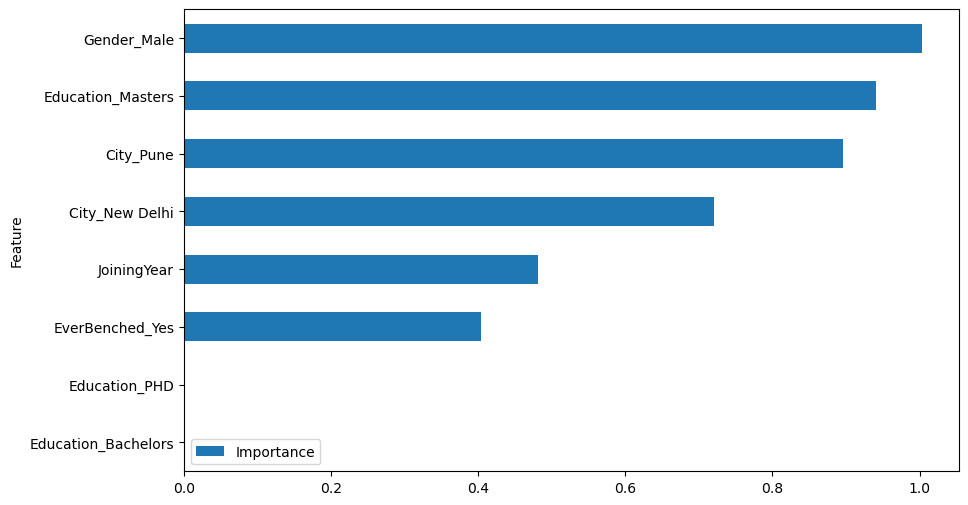

In [106]:
coefficients = SGD_model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_train_new.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [107]:
predictions = SGD_model.predict(X_test_new)

In [108]:
accuracy_score(y_test,predictions)

0.7303974221267454

In [109]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       611
           1       0.66      0.45      0.54       320

    accuracy                           0.73       931
   macro avg       0.70      0.66      0.67       931
weighted avg       0.72      0.73      0.72       931



In [110]:
confusion_matrix(y_test,predictions)

array([[535,  76],
       [175, 145]], dtype=int64)

In [111]:
metrics = {
    'Precision': precision_score(y_test, predictions),
    'Recall': recall_score(y_test, predictions),
    'AUC': roc_auc_score(y_test, predictions),
    'F1 Score': f1_score(y_test, predictions),
    'Accuracy': accuracy_score(y_test, predictions)
}

for metric, value in metrics.items():
    print(f'{metric}: {value:.2f}')

Precision: 0.66
Recall: 0.45
AUC: 0.66
F1 Score: 0.54
Accuracy: 0.73
